In [1]:
import pandas as pd
import random
import math
import seaborn as sbn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("SalariesSimple.csv")
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0
1654                     2.0             50.0

[1655 rows x 2 columns]


In [3]:
df.isnull().values.any()
df.dropna(inplace=True)

In [4]:
df.isnull().values.any()

False

In [5]:
df.sort_values(by='annual_base_pay', ascending=True)

,total_experience_years,annual_base_pay
1143,8.0,0.000000e+00
1361,1.0,0.000000e+00
382,20.0,0.000000e+00
18,0.0,2.400000e+01
306,6.0,2.800000e+01
...,...,...
221,16.0,9.250000e+06
1088,30.0,1.028000e+07
1639,7.0,5.000000e+07
1135,0.0,1.560000e+08


In [6]:
sal = df[ (df['annual_base_pay'] < 500)].index
sal2 = df[ (df['annual_base_pay'] > 300000)].index
df.drop(sal, inplace=True)
df.drop(sal2, inplace=True)
df.head(15)

,total_experience_years,annual_base_pay
0,13.0,125000.0
1,15.0,65000.0
2,4.0,86000.0
3,4.0,105000.0
4,4.0,110000.0
5,5.0,40000.0
6,4.0,45000.0
7,8.0,135000.0
8,2.0,105000.0
9,1.0,80000.0


In [7]:
print(df)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1648                     4.0         130000.0
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0

[1518 rows x 2 columns]


<AxesSubplot:xlabel='total_experience_years', ylabel='annual_base_pay'>

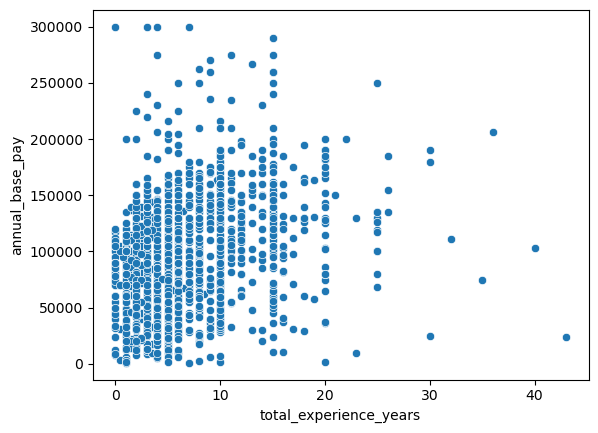

In [8]:
sbn.scatterplot(data=df,x='total_experience_years', y = 'annual_base_pay')

In [9]:
df.describe()

,total_experience_years,annual_base_pay
count,1518.000000,1518.000000
mean,6.654368,98057.902279
std,5.405061,48828.359118
min,0.000000,900.000000
25%,3.000000,62676.000000
50%,5.000000,98000.000000
75%,10.000000,128875.000000
max,43.000000,300000.000000


In [10]:
#Split Code

dfTrain=df.loc[:1092]
dfTest=df.loc[1093:]

In [11]:
print(dfTest)

      total_experience_years  annual_base_pay
1093                     5.0         205000.0
1094                    11.0          32900.0
1097                     2.0          34000.0
1098                     1.0          45000.0
1099                     0.0         105000.0
...                      ...              ...
1648                     4.0         130000.0
1650                     1.0          60500.0
1651                     6.0         164000.0
1652                     7.0         150000.0
1653                     5.0          75000.0

[507 rows x 2 columns]


In [12]:
print(dfTrain)

      total_experience_years  annual_base_pay
0                       13.0         125000.0
1                       15.0          65000.0
2                        4.0          86000.0
3                        4.0         105000.0
4                        4.0         110000.0
...                      ...              ...
1087                     6.0          28000.0
1089                     7.0         130000.0
1090                     3.0          84000.0
1091                     1.0         105000.0
1092                     2.0          70000.0

[1011 rows x 2 columns]


In [13]:
df.sort_values(by='annual_base_pay', ascending=True)

,total_experience_years,annual_base_pay
1012,7.0,900.0
1339,1.0,1000.0
1637,1.0,1400.0
402,20.0,1500.0
1394,5.0,1520.0
...,...,...
948,15.0,290000.0
121,0.0,300000.0
432,3.0,300000.0
375,4.0,300000.0


In [31]:
def lineReg(dfTrain):
    count = 0
    slopes = {}
    while count< 100:
        a = 300      #50000 4889 20000 3741 25000 3898
        b = 0
        c = 0
        sum = sumOfDistances(a, b, c, dfTrain)
        slopes[a] = sum
        count = count + 1
    print(slopes)

In [32]:
def sumOfDistances(a, b, c, dfTrain):
    sum = 0
    for row in range(0, len(dfTrain.index)):
        yrs = dfTrain.iat[row, 0]
        pay = dfTrain.iat[row, 1]
        distance = abs((a * yrs) + (b * pay + c)) / (math.sqrt(a * a + b * b))
        sum = sum + distance
    return sum

In [33]:
lineReg(dfTrain)

{300: 6661.98}


In [17]:
def MSE(dfTest, a, b):
    sum = 0
    for row in range(0, len(dfTest.index)):
        yrs = dfTest.iat[row, 0]
        actual = dfTest.iat[row,1]
        predicted = a * yrs + b
        sum = sum + (predicted - actual)*(predicted - actual)
    return sum/len(dfTest.index)

In [18]:
print(MSE(dfTest, 20000, -1))

14446468368.094513


In [19]:
20000*24

480000

In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(dfTrain, dfTrain['annual_base_pay'])

LinearRegression()

In [22]:
predictions = regr.predict(dfTest)

In [23]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [8.57650079e-13 1.00000000e+00]


In [24]:
mean_squared_error(dfTest['total_experience_years'],predictions)

11245296634.194756

In [25]:
print("Coefficient of determination: %.2f" % r2_score(dfTest, predictions))

ValueError: y_true and y_pred have different number of output (2!=1)